<a href="https://colab.research.google.com/github/JPineiro13/interacting-with-api-python-project-tutorial/blob/main/4geeks_interacting_with_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las tres pistas principales son:
   duration_ms                                               name  popularity
9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56
  
Todas las pistas son:
   duration_ms                                               name  popularity
9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56
8     2.827767                         Requiem, K. 626: Lacrimosa          58
6     7.667100  Symphony No. 25 in G Minor, K. 183: I. Allegro...          59
7     8.622667                          Adagio in E Major, K. 261          59
0     3.330667  Requiem in D Minor, K. 626: Sequence: VI. Lacr...          60
3     

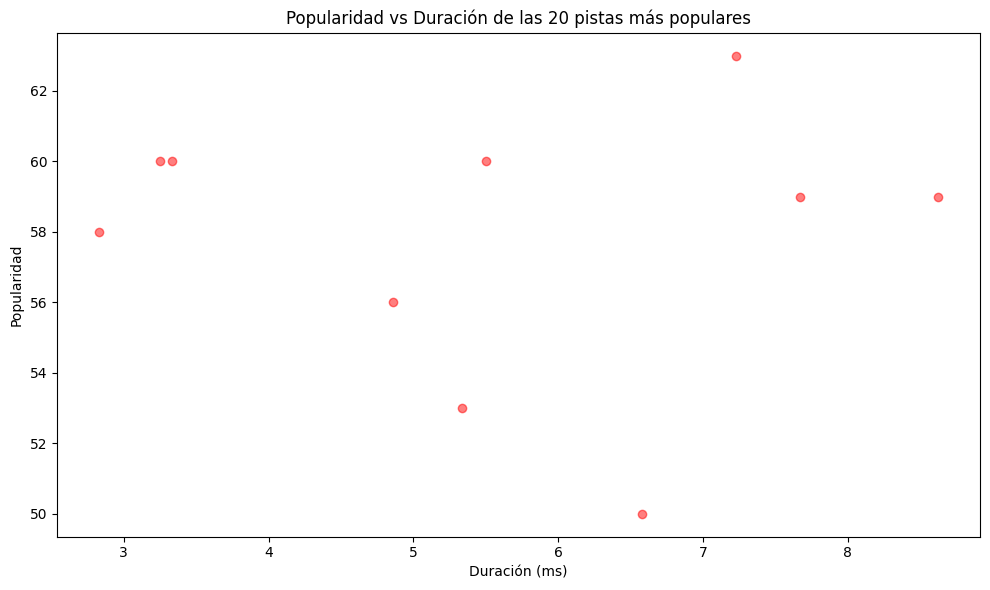

In [11]:
#He añadido lo de os.system para poder instalar spotipy en el entorno de collab.
#Hay un par de líneas comentadas más adelante porque también lo he estado probando en local
import os
os.system("pip install spotipy");
import pandas as pd
#from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

#load_dotenv()

#El .env ha sido creado en local con estos datos:
#CLIENT_ID="3622e33b8acb42a282c1497355897099"
#CLIENT_SECRET="5f6b1f8749cb4d31896a5f52774b20da"


# Me conecto a spotify con los valores que tengo en el .env
#client_id = os.environ.get('CLIENT_ID')
#client_secret = os.environ.get('CLIENT_SECRET')


client_id = '3622e33b8acb42a282c1497355897099'
client_secret = '5f6b1f8749cb4d31896a5f52774b20da'

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


# Selecciono el artista que quiero (Mozart), le pido sus top tracks y los guardo en response
artist_id = "4NJhFmfw43RLBLjQvxDuRS"

response = sp.artist_top_tracks("4NJhFmfw43RLBLjQvxDuRS")
if response:
#Si devuelve las pistas las guardo en tracks
  tracks = response["tracks"]
else:
	print("No se han podido obtener top tracks")

tracks_todas = tracks
# Hago una sublista de todas las pistas con las tres primeras
tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]



# Ahora creo el dataframe de la sublista de las tres primeras, y la lista con las 20 primeras
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)
print("Las tres pistas principales son:")
print(tracks_df.head(3))

# Aquí están las 20 primersa sin tratar
tracks_todas_df = pd.DataFrame.from_records(tracks)
tracks_todas_df.sort_values(["popularity"], inplace = True)
print("  ")
print("Todas las pistas son:")
print(tracks_todas_df.head(20))


#Ahora genero el scatterplot
all_tracks = tracks_todas_df.head(20)
plt.figure(figsize=(10, 6))
plt.scatter(all_tracks["duration_ms"], all_tracks["popularity"], color='red', alpha=0.5)
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.title('Popularidad vs Duración de las 20 pistas más populares')
plt.tight_layout()

# Muestra el gráfico
plt.show()




#Genera esta salida:
#jesu@Esthers-MacBook-Pro src % python3 app.py
#Las tres pistas principales son:
   #duration_ms                                               name  popularity
#9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
#4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
#1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56

#Todas las pistas son:
#   duration_ms                                               name  popularity
#9     6.576000  Mozart: Clarinet Concerto in A Major, K. 622: ...          50
#4     5.332883                Mozart: Fantasia in D Minor, K. 397          53
#1     4.861100  Piano Sonata No. 16 in C Major, K. 545 "Sonata...          56
#8     2.827767                         Requiem, K. 626: Lacrimosa          58
#6     7.667100  Symphony No. 25 in G Minor, K. 183: I. Allegro...          59
#7     8.622667                          Adagio in E Major, K. 261          59
#0     3.330667  Requiem in D Minor, K. 626: Sequence: VI. Lacr...          60
#3     5.500000  Serenade in B-Flat Major, K. 361 "Gran Partita...          60
#5     3.250000  Ave verum corpus, K.618 (Arr. for Piano by Fra...          60
#2     7.227767  Piano Concerto No. 21 in C Major, K. 467: II. ...          63

